<a href="https://colab.research.google.com/github/RobertMa05/Selected-Topic2-Movie-Recommendation/blob/main/SINA%20Group%20Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from openpyxl import load_workbook
import re

#ml-100k_datasets

In [2]:
data_header = ['user_id', 'item_id', 'rating', 'timestamp']
movirlens_data = pd.read_csv('https://raw.githubusercontent.com/RobertMa05/Selected-Topic2-Movie-Recommendation/main/ml-100k_datasets/u.data', sep='\s+', names = data_header)
genre_header = ['genre', 'genre_id']
movirlens_genre = pd.read_csv('https://raw.githubusercontent.com/RobertMa05/Selected-Topic2-Movie-Recommendation/main/ml-100k_datasets/u.genre', sep='|', names = genre_header)
item_header = ['movie_id', 'movie_title', 'release_date', 'video_release_date',
              'IMDb_URL', 'unknown', 'Action', 'Adventure', 'Animation',
              "Children's", 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy',
              'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi',
              'Thriller', 'War', 'Western']
movirlens_item = pd.read_csv('https://raw.githubusercontent.com/RobertMa05/Selected-Topic2-Movie-Recommendation/main/ml-100k_datasets/u.item', sep='|', names = item_header, encoding='unicode_escape')
info_header = ['number', 'info']
movirlens_info = pd.read_csv('https://raw.githubusercontent.com/RobertMa05/Selected-Topic2-Movie-Recommendation/main/ml-100k_datasets/u.info', sep='\s+', names = info_header)
occupation_header = ['occupation']
movirlens_occupation = pd.read_csv('https://raw.githubusercontent.com/RobertMa05/Selected-Topic2-Movie-Recommendation/main/ml-100k_datasets/u.occupation', sep='\t', names = occupation_header)
user_header = ['user_id', 'age', 'gender', 'occupation', 'zip_code']
movirlens_user = pd.read_csv('https://raw.githubusercontent.com/RobertMa05/Selected-Topic2-Movie-Recommendation/main/ml-100k_datasets/u.user', sep='|', names = user_header)

In [3]:
# movirlens_genre
# movirlens_item
movirlens_info
# movirlens_occupation
# movirlens_user
# movirlens_data

,number,info
0,943,users
1,1682,items
2,100000,ratings


#ml-1m_datasets

In [4]:
movies_header = ['movie_id', 'movie_title', 'genres']
ml_1m_movies = pd.read_csv('https://raw.githubusercontent.com/RobertMa05/Selected-Topic2-Movie-Recommendation/main/ml-1m/movies.dat', sep='::', names = movies_header, encoding='unicode_escape', engine='python')
ratings_header = ['user_id', 'movie_id', 'rating', 'timestamp']
ml_1m_ratings = pd.read_csv('https://raw.githubusercontent.com/RobertMa05/Selected-Topic2-Movie-Recommendation/main/ml-1m/ratings.dat', sep='::', names = ratings_header, encoding='unicode_escape', engine='python')
users_header = ['user_id', 'gender', 'age', 'occupation', 'zip_code']
ml_1m_users = pd.read_csv('https://raw.githubusercontent.com/RobertMa05/Selected-Topic2-Movie-Recommendation/main/ml-1m/users.dat', sep='::', names = users_header, encoding='unicode_escape', engine='python')

In [5]:
# ml_1m_movies
ml_1m_ratings
# ml_1m_users

,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291
...,...,...,...,...
1000204,6040,1091,1,956716541
1000205,6040,1094,5,956704887
1000206,6040,562,5,956704746
1000207,6040,1096,4,956715648


# Data Preprocessing

In [6]:
# unipue the headers
renamed_data=movirlens_data.rename(columns={'item_id':'movie_id'})
renamed_data.head()

,user_id,movie_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [7]:
#Merge dataset on the same movie id
merge_movie = pd.merge(renamed_data, movirlens_item, on='movie_id')
merge_movie.head()

,user_id,movie_id,rating,timestamp,movie_title,release_date,video_release_date,IMDb_URL,unknown,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,196,242,3,881250949,Kolya (1996),24-Jan-1997,NaN,http://us.imdb.com/M/title-exact?Kolya%20(1996),0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,63,242,3,875747190,Kolya (1996),24-Jan-1997,NaN,http://us.imdb.com/M/title-exact?Kolya%20(1996),0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,226,242,5,883888671,Kolya (1996),24-Jan-1997,NaN,http://us.imdb.com/M/title-exact?Kolya%20(1996),0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,154,242,3,879138235,Kolya (1996),24-Jan-1997,NaN,http://us.imdb.com/M/title-exact?Kolya%20(1996),0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,306,242,5,876503793,Kolya (1996),24-Jan-1997,NaN,http://us.imdb.com/M/title-exact?Kolya%20(1996),0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [8]:
#Continue to merge datasets，on the user
merged_user = pd.merge(merge_movie, movirlens_user, on='user_id')
merged_user.head()

,user_id,movie_id,rating,timestamp,movie_title,release_date,video_release_date,IMDb_URL,unknown,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,age,gender,occupation,zip_code
0,196,242,3,881250949,Kolya (1996),24-Jan-1997,NaN,http://us.imdb.com/M/title-exact?Kolya%20(1996),0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,49,M,writer,55105
1,196,257,2,881251577,Men in Black (1997),04-Jul-1997,NaN,http://us.imdb.com/M/title-exact?Men+in+Black+...,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,49,M,writer,55105
2,196,111,4,881251793,"Truth About Cats & Dogs, The (1996)",26-Apr-1996,NaN,http://us.imdb.com/M/title-exact?Truth%20About...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,49,M,writer,55105
3,196,25,4,881251955,"Birdcage, The (1996)",08-Mar-1996,NaN,"http://us.imdb.com/M/title-exact?Birdcage,%20T...",0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,49,M,writer,55105
4,196,382,4,881251843,"Adventures of Priscilla, Queen of the Desert, ...",01-Jan-1994,NaN,http://us.imdb.com/M/title-exact?Adventures%20...,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,49,M,writer,55105


In [9]:
# Calculate mean rating of all movies
merged_user.groupby('movie_title')['rating'].mean().sort_values(ascending=False).head()

movie_title
Marlene Dietrich: Shadow and Light (1996)     5.0
Prefontaine (1997)                            5.0
Santa with Muscles (1996)                     5.0
Star Kid (1997)                               5.0
Someone Else's America (1995)                 5.0
Name: rating, dtype: float64

In [10]:
# Calculate count rating of all movies
merged_user.groupby('movie_title')['rating'].count().sort_values(ascending=False).head()

movie_title
Star Wars (1977)             583
Contact (1997)               509
Fargo (1996)                 508
Return of the Jedi (1983)    507
Liar Liar (1997)             485
Name: rating, dtype: int64

# Memory-based algorithms (Collaborative Filtering)

## User-based and Item-based Collaborative Filtering Recommendation

In [11]:
import numpy as np
from sklearn.model_selection import train_test_split

In [12]:
#Learn the number of users and movies
n_users = movirlens_data.user_id.unique().shape[0]
n_items = movirlens_data.item_id.unique().shape[0]

In [13]:
print('Number of users =',str(n_users),' | Number of movies = ', str(n_items))

Number of users = 943  | Number of movies =  1682


In [14]:
#split train dataset and test dataset
train_data,test_data = train_test_split(movirlens_data, test_size = 0.2)

In [15]:
#User-Item Matrix for train data
train_data_matrix = np.zeros((n_users,n_items))
 
for line in train_data.itertuples():
  train_data_matrix[line[1]-1, line[2]-1] = line[3]
  
#User-Item Matrix for test data
test_data_matrix = np.zeros((n_users, n_items))
 
for line in test_data.itertuples():
  test_data_matrix[line[1]-1, line[2]-1] = line[3]
 

In [16]:
#Show the train data matrix
print('Train Dataset Matrix: \n', train_data_matrix)

Train Dataset Matrix: 
 [[5. 3. 4. ... 0. 0. 0.]
 [4. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [5. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 5. 0. ... 0. 0. 0.]]


In [17]:
#Show the test data matrix
print('Test Dataset Matrix: \n', test_data_matrix)


Test Dataset Matrix: 
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [18]:
#Calculate cosine similarity.
from sklearn.metrics.pairwise import pairwise_distances 
user_similarity = pairwise_distances(train_data_matrix, metric = "cosine") 
item_similarity = pairwise_distances(train_data_matrix.T, metric = "cosine")

# user_similarity = pairwise_distances(train_data_matrix, metric = "euclidean") 
# item_similarity = pairwise_distances(train_data_matrix.T, metric = "euclidean")

In [19]:
#function that predict ratings by user-based and item-based collaborative filtering recommendation
def CF_predict(rating, similarity, type = 'user'):
 #user-based
  if type == 'user':
    mean_user_rating = rating.mean(axis = 1)
    rating_diff = (rating - mean_user_rating[:,np.newaxis])
    pred = mean_user_rating[:,np.newaxis] + similarity.dot(rating_diff) / np.array([np.abs(similarity).sum(axis=1)]).T
 #item-based
  elif type == 'item':
    pred = rating.dot(similarity) / np.array([np.abs(similarity).sum(axis=1)])
  
  return pred
 

In [20]:
#call the function to do predictions
item_prediction = CF_predict(train_data_matrix, item_similarity, type = 'item')
user_prediction = CF_predict(train_data_matrix, user_similarity, type = 'user')

In [21]:
#user-based prediction
print('Prediction on user-based recommendaiton: \n', user_prediction)

Prediction on user-based recommendaiton: 
 [[ 1.74918629  0.64221931  0.52259694 ...  0.33642065  0.33629539
   0.33616027]
 [ 1.45534292  0.32096899  0.14651867 ... -0.06720234 -0.06595224
  -0.06561035]
 [ 1.47547606  0.2746583   0.11011563 ... -0.11153513 -0.10987169
  -0.10956684]
 ...
 [ 1.34019507  0.24524644  0.08008134 ... -0.12551945 -0.12465043
  -0.1243992 ]
 [ 1.50961314  0.34360153  0.20682653 ... -0.01051962 -0.00965847
  -0.0092879 ]
 [ 1.5379047   0.41441869  0.30520536 ...  0.11990274  0.11960095
   0.11978828]]


In [22]:
#item-based prediction
print('Prediction on item-based recommendaiton: \n', item_prediction)

Prediction on item-based recommendaiton: 
 [[0.39955807 0.42114086 0.44058648 ... 0.4974893  0.48676951 0.48207649]
 [0.09153124 0.10783323 0.10340947 ... 0.10943153 0.11052268 0.11159627]
 [0.06500131 0.06925939 0.06694228 ... 0.06527088 0.06827644 0.06924198]
 ...
 [0.03506483 0.04499492 0.04367087 ... 0.05055208 0.04991028 0.05048301]
 [0.13425019 0.14438604 0.15344786 ... 0.15851311 0.1578118  0.15988297]
 [0.21363891 0.21303669 0.24005689 ... 0.28147876 0.27160639 0.27215769]]


In [23]:
#Construct a reverse map of indices and movie titles
indices = pd.Series(movirlens_item.index, index=movirlens_item['movie_title']).drop_duplicates()
# indices = pd.Series(ml_1m_movies.index, index=ml_1m_movies['movie_title']).drop_duplicates()

In [24]:
#show the titles of the movies
print('Titles of the movies(top): \n', indices.head())

Titles of the movies(top): 
 movie_title
Toy Story (1995)     0
GoldenEye (1995)     1
Four Rooms (1995)    2
Get Shorty (1995)    3
Copycat (1995)       4
dtype: int64


In [25]:
# Function that takes in movie title as input and outputs most similar movies
def CF_get_recommendations(title, cosine_sim):
    # Get the index of the movie that matches the title
    idx = indices[title]

    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    return movirlens_item['movie_title'].iloc[movie_indices]

In [26]:
#get similar movies of Star Wars by item-based
print('Item-based_Top 10 similar movies of Star Wars (1977): \n', CF_get_recommendations('Star Wars (1977)', item_prediction))

Item-based_Top 10 similar movies of Star Wars (1977): 
 1545                         Shadows (Cienie) (1988)
1547                            The Courtyard (1995)
1553                             Safe Passage (1994)
1555                            Condition Red (1995)
1556                              Yankee Zulu (1994)
1558                       Hostile Intentions (1994)
1560      Tigrero: A Film That Was Never Made (1994)
1561    Eye of Vichy, The (Oeil de Vichy, L') (1993)
1562          Promise, The (Versprechen, Das) (1994)
1565                 Man from Down Under, The (1943)
Name: movie_title, dtype: object


In [27]:
#get similar movies of Star Wars by user-based
print('User-based_Top 10 similar movies of Star Wars (1977): \n' , CF_get_recommendations('Star Wars (1977)', user_prediction))

User-based_Top 10 similar movies of Star Wars (1977): 
 257                      Contact (1997)
99                         Fargo (1996)
180           Return of the Jedi (1983)
173      Raiders of the Lost Ark (1981)
0                      Toy Story (1995)
285         English Patient, The (1996)
126               Godfather, The (1972)
97     Silence of the Lambs, The (1991)
55                  Pulp Fiction (1994)
287                       Scream (1996)
Name: movie_title, dtype: object


## Model-based algorithms - Matrix Decomposition (SVD)
The model-based recommendation algorithm uses matrix decomposition to effectively alleviate the problem of data sparsity. Matrix factorization is a method of reducing the dimensionality, extracting features, and improving the accuracy of recommendation. Model-based methods include decision tree, rule-based models, Bayesian methods, and latent factor models

In [28]:
#User-Item Matrix for train data
movirlens_data_matrix = np.zeros((n_users, n_items))

for line in movirlens_data.itertuples():
  movirlens_data_matrix[line[1]-1, line[2]-1] = line[3]

'''
ml_1m dataset
'''
# n_users = ml_1m_ratings.user_id.unique().shape[0]
# n_items = ml_1m_ratings.movie_id.unique().shape[0]

# # User-Item Matrix for train data
# ml_1m_ratings_matrix = np.zeros((n_users, n_items))
 
# for line in ml_1m_ratings.itertuples():
#   ml_1m_ratings_matrix[line[1]-1, line[2]-1] = line[3]

'\nml_1m dataset\n'

In [29]:
# Import SVD matrix
import scipy.sparse as sp
from scipy.sparse.linalg import svds
# Singular value decomposition, 
# Hyperparameter k is the number of eigenvalues set
u, s, vt = svds(movirlens_data_matrix,k=20) #Calculate k singular values of train_data_matrix
s_diag_matrix = np.diag(s) #Extract and construct a diagonal array, S is a diagonal matrix
svd_prediction = np.dot(np.dot(u,s_diag_matrix),vt)

In [30]:
# The predicted value limits the minimum and maximum values
# The predicted value less than 0 is set to 0, and the predicted value is greater than 5 to 5
svd_prediction[svd_prediction < 0] =0
svd_prediction[svd_prediction > 5] =5

In [31]:
#get prediction by svd model-based algorithm
print('Prediciton of SVD model-based algorithm: \n', svd_prediction)


Prediciton of SVD model-based algorithm: 
 [[4.01688618e+00 2.10514989e+00 1.37439578e+00 ... 0.00000000e+00
  2.64379479e-02 7.33806834e-02]
 [1.99295186e+00 0.00000000e+00 0.00000000e+00 ... 9.28078660e-03
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 1.81311614e-01 ... 2.16443047e-02
  1.91721169e-03 2.49374917e-04]
 ...
 [2.23624102e+00 3.89103327e-02 2.76077652e-01 ... 0.00000000e+00
  1.07306047e-02 0.00000000e+00]
 [1.31024409e+00 1.55156267e-01 0.00000000e+00 ... 1.50293142e-02
  1.15206267e-02 0.00000000e+00]
 [1.72204325e+00 2.05335046e+00 1.18288029e+00 ... 0.00000000e+00
  1.73695571e-02 2.05937102e-02]]


In [32]:
#get similar movies of Star Wars by SVD model-based
print('SVD Model-based_Top 10 similar movies of Star Wars (1977): \n',CF_get_recommendations('Star Wars (1977)', svd_prediction))


SVD Model-based_Top 10 similar movies of Star Wars (1977): 
 474                  Trainspotting (1996)
287                         Scream (1996)
275              Leaving Las Vegas (1995)
99                           Fargo (1996)
285           English Patient, The (1996)
507    People vs. Larry Flynt, The (1996)
8                 Dead Man Walking (1995)
245                    Chasing Amy (1997)
149                       Swingers (1996)
126                 Godfather, The (1972)
Name: movie_title, dtype: object


## Predicted Score Evaluation for User-based and Item-based and Model-based algorithm(RMSE & MSE)

In [33]:
from sklearn.metrics import mean_squared_error 
from math import sqrt

'''RMSE evaluation function'''
def rmse(prediction, ground_truth):
  prediction = prediction[ground_truth.nonzero()].flatten()
  ground_truth = ground_truth[ground_truth.nonzero()].flatten()
  return sqrt(mean_squared_error(prediction, ground_truth))
  
'''MSE evaluation function'''
def mse(prediction, ground_truth):
  prediction = prediction[ground_truth.nonzero()].flatten()
  ground_truth = ground_truth[ground_truth.nonzero()].flatten()
  return mean_squared_error(prediction, ground_truth)

In [34]:
#Get the RMSE evalutaiton results for 3 types recommendation
print('Train_User based CF RMSE:' + str(rmse(user_prediction, train_data_matrix))) 
print('Test_User based CF RMSE:' + str(rmse(user_prediction, test_data_matrix)))
print('Train_Item based CF RMSe: ' + str(rmse(item_prediction, train_data_matrix))) 
print('Test_Item based CF RMSe: ' + str(rmse(item_prediction, test_data_matrix)))
print('Train_SVD based CF RMSe: ' + str(rmse(svd_prediction, train_data_matrix)))
print('Test_SVD based CF RMSe: ' + str(rmse(svd_prediction, test_data_matrix))) 

Train_User based CF RMSE:3.0954932339816597
Test_User based CF RMSE:3.0871336222867702
Train_Item based CF RMSe: 3.4441511379848357
Test_Item based CF RMSe: 3.4346798736376316
Train_SVD based CF RMSe: 2.1295356588155325
Test_SVD based CF RMSe: 2.115134553805304


In [35]:
#Get the MSE evalutaiton results for 3 types recommendation
print('Train_User based CF MSE:' + str(mse(user_prediction, train_data_matrix))) 
print('Test_User based CF MSE:' + str(mse(user_prediction, test_data_matrix)))
print('Train_Item based CF MSe: ' + str(mse(item_prediction, train_data_matrix))) 
print('Test_Item based CF MSe: ' + str(mse(item_prediction, test_data_matrix)))
print('Train_SVD based CF MSe: ' + str(mse(svd_prediction, train_data_matrix)))
print('Test_SVD based CF MSe: ' + str(mse(svd_prediction, test_data_matrix))) 

Train_User based CF MSE:9.582078361626234
Test_User based CF MSE:9.530394001853434
Train_Item based CF MSe: 11.862177061282239
Test_Item based CF MSe: 11.797025834371416
Train_SVD based CF MSe: 4.534922122166905
Test_SVD based CF MSe: 4.473794180701162


##Top-N prediction and evaluation for User-based and Item-based and Model-based algorithms(Recall score)

### Choose the model to predict

In [36]:
# choose the model that evaluate on 
pre_score = user_prediction

# pre_score = item_prediction

# pre_score = svd_prediction

In [37]:
#get the similarity tables
user_sim = pd.DataFrame(user_prediction, index = movirlens_data.user_id.unique(), columns=movirlens_item['movie_id'])
item_sim = pd.DataFrame(item_prediction, index = movirlens_data.user_id.unique(), columns=movirlens_item['movie_id'])
svd_sim = pd.DataFrame(svd_prediction, index = movirlens_data.user_id.unique(), columns=movirlens_item['movie_id'])

In [38]:
# the user based similarity
user_sim

movie_id,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,...,1643,1644,1645,1646,1647,1648,1649,1650,1651,1652,1653,1654,1655,1656,1657,1658,1659,1660,1661,1662,1663,1664,1665,1666,1667,1668,1669,1670,1671,1672,1673,1674,1675,1676,1677,1678,1679,1680,1681,1682
196,1.749186,0.642219,0.522597,0.877785,0.550002,0.400997,1.493372,0.997182,1.267142,0.571600,1.032832,1.183465,0.812874,0.881643,1.170299,0.432017,0.528129,0.351436,0.545733,0.536157,0.528891,1.302749,0.891229,0.774333,1.147967,0.508295,0.461847,1.111165,0.559248,0.433083,0.732340,0.547584,0.538665,0.348648,0.357159,0.353978,0.343594,0.612973,0.525483,0.454089,...,0.340620,0.337196,0.337326,0.340970,0.336470,0.333902,0.336470,0.337326,0.337326,0.339572,0.340419,0.334940,0.335442,0.340862,0.336358,0.343542,0.334821,0.335739,0.334890,0.338779,0.336341,0.346583,0.336341,0.336341,0.337560,0.337560,0.336341,0.337560,0.335169,0.336152,0.333902,0.333902,0.333902,0.336025,0.336569,0.335161,0.337680,0.336421,0.336295,0.336160
186,1.455343,0.320969,0.146519,0.603400,0.188727,0.004728,1.193071,0.706369,0.897068,0.205680,0.765251,0.932413,0.445281,0.484068,0.798130,0.028472,0.172714,-0.045050,0.141393,0.148752,0.155214,1.059604,0.600392,0.438895,0.781585,0.135901,0.090680,0.860459,0.208564,0.053098,0.417881,0.192869,0.195991,-0.051457,-0.042290,-0.043383,-0.054658,0.273767,0.167810,0.079696,...,-0.062283,-0.066142,-0.065224,-0.061953,-0.066189,-0.069083,-0.066189,-0.065224,-0.065224,-0.064072,-0.063250,-0.068057,-0.066952,-0.061635,-0.065716,-0.060928,-0.068019,-0.066955,-0.068024,-0.065130,-0.067106,-0.055807,-0.067106,-0.067106,-0.066118,-0.066118,-0.067106,-0.066118,-0.068099,-0.066965,-0.069083,-0.069083,-0.069083,-0.067017,-0.065916,-0.068142,-0.066262,-0.067202,-0.065952,-0.065610
22,1.475476,0.274658,0.110116,0.559916,0.142346,-0.031801,1.183582,0.672487,0.907388,0.167900,0.722998,0.897250,0.441218,0.500451,0.801836,-0.005635,0.125920,-0.087488,0.121044,0.122261,0.113799,1.011112,0.555002,0.404820,0.801353,0.098869,0.044662,0.818295,0.161697,0.009706,0.373455,0.149517,0.146874,-0.095068,-0.087437,-0.087073,-0.098804,0.224624,0.121401,0.036415,...,-0.106201,-0.110352,-0.108914,-0.106101,-0.109952,-0.113065,-0.109952,-0.108914,-0.108914,-0.107716,-0.107700,-0.112133,-0.110969,-0.106013,-0.109693,-0.104430,-0.112004,-0.110944,-0.111958,-0.109714,-0.111389,-0.100297,-0.111389,-0.111389,-0.110551,-0.110551,-0.111389,-0.110551,-0.112279,-0.111139,-0.113065,-0.113065,-0.113065,-0.111176,-0.109874,-0.112300,-0.110770,-0.111535,-0.109872,-0.109567
244,1.431426,0.247616,0.086723,0.532122,0.119365,-0.052228,1.145245,0.645440,0.880993,0.148834,0.679185,0.866939,0.418480,0.477109,0.769096,-0.025038,0.102251,-0.107397,0.099412,0.102480,0.091049,0.974985,0.528960,0.375826,0.768759,0.078856,0.021627,0.785359,0.137404,-0.010201,0.348212,0.127993,0.122848,-0.115003,-0.107540,-0.106937,-0.118620,0.198475,0.098794,0.014724,...,-0.125585,-0.129957,-0.128540,-0.125524,-0.129633,-0.132912,-0.129633,-0.128540,-0.128540,-0.127542,-0.127434,-0.131988,-0.130839,-0.125100,-0.129675,-0.123543,-0.131841,-0.130769,-0.131810,-0.129188,-0.131050,-0.119889,-0.131050,-0.131050,-0.130119,-0.130119,-0.131050,-0.130119,-0.131983,-0.130858,-0.132912,-0.132912,-0.132912,-0.130733,-0.129925,-0.132083,-0.130424,-0.131254,-0.129840,-0.129546
166,1.522094,0.394598,0.284673,0.650753,0.310812,0.164725,1.274783,0.770080,1.065315,0.340328,0.814041,0.985532,0.598082,0.668639,0.945144,0.191458,0.283582,0.110200,0.317114,0.310206,0.274789,1.069638,0.678677,0.539337,0.911604,0.275081,0.221711,0.879638,0.306994,0.196051,0.499370,0.321035,0.301147,0.102924,0.108903,0.110149,0.099273,0.369011,0.284470,0.204648,...,0.095131,0.091069,0.091644,0.095552,0.090629,0.087581,0.090629,0.091644,0.091644,0.093279,0.093692,0.088624,0.089297,0.094843,0.090026,0.098371,0.088517,0.089453,0.088421,0.092524,0.090053,0.100851,0.090053,0.090053,0.091289,0.091289,0.090053,0.091289,0.088

In [39]:
# transfer to matrix
user_sim_pre = user_sim.T.to_dict()
item_sim_pre = item_sim.T.to_dict()
svd_sim_pre = svd_sim.T.to_dict()

###Data Pre-processing

In [40]:
# Separate the data set according to the ratio of 8:2, according to the timestamp
train_data = movirlens_data.sort_values(by = ['timestamp'], ascending = True)[0:int(np.trunc(movirlens_data.shape[0]*0.8))].copy()
renamed_train_data=train_data.rename(columns={'item_id':'movie_id'})
train_data = pd.merge(renamed_train_data, movirlens_item, on='movie_id')
train = {}
for uid, mid, rating in np.array(train_data[['user_id','movie_id','rating']]).tolist():
  train.setdefault(uid, [])
  train[uid].append(mid)

test_data = movirlens_data.sort_values(by = ['timestamp'], ascending = True)[int(np.trunc(movirlens_data.shape[0]*0.8)):].copy()
renamed_test_data=test_data.rename(columns={'item_id':'movie_id'})
test_data = pd.merge(renamed_test_data, movirlens_item, on='movie_id')
test = {}
for uid, mid, rating in np.array(test_data[['user_id','movie_id','rating']]).tolist():
  test.setdefault(uid, [])
  test[uid].append(mid)

### Recommendation System

In [41]:
def top_n_recommend(user, K, top_N, sim):
    """
    recommend item according to user.
    :param user:
    :param top_N: the number of recommend items
    :param K: the number of most similar users
    :return:  recommend items dict, {item: similarity}
    """
    already_items = set(train.get(user, set()))
    recommend_items = dict()
    for v, sim in sorted(sim.get(user,dict()).items(), key=lambda x:-x[1])[0:K]:
      if v in train.keys():
        for item in train[v]:
            if item in already_items:
                continue
            recommend_items[item] = recommend_items.get(item,0) + sim
    recommend_item_list = sorted(recommend_items.items(), key=lambda x:-x[1])[0:top_N]
    return recommend_item_list

def top_n_recommend_users(users, K, top_N, sim):
    """

    :param users:
    :param top_N:
    :param K:
    :return: dict, {user:[movie1, movie2]}
    """
    recommend_result = dict()
    for user in users:
        recommend_item_list = top_n_recommend(user, K, top_N, sim)
        recommend_result[user] = recommend_item_list
    return recommend_result

In [42]:
# recommend on user uid
uid = 6
print('Top 10 movies recommended to user',uid,'(movie id, weights): \n', top_n_recommend_users([uid], 150, 10, user_sim_pre))

Top 10 movies recommended to user 6 (movie id, weights): 
 {6: [(181, 69.89818696575958), (222, 54.159184579887274), (121, 52.97770246012212), (288, 51.23579201229484), (210, 48.708752792265685), (172, 46.40270329525419), (300, 46.03654111900417), (234, 42.83333987239512), (176, 41.8076591563495), (196, 41.38991623300388)]}


### Evaluation on three models(Recall)

In [43]:
def CF_recall(true, pred):
    """
    CF_recall value = |true == pred|/len(true)
    :param true: dict, {user:[item1, item2]
    :param pred: dict, recommend list for each user. e.g.{user:[(user2, similarity)]}
    :return:
    >>> true = {"u1":["item1", "item2"]}
    >>> pred = {"u1":[("u2", 0.6), ("u3", 0.1)]}
    """
    pred_true = 0
    all_true = 0

    for user, items in pred.items():
        for item in items:
            v, _ = item[0], item[1]
            if v in true[user]:
                pred_true += 1
        all_true += len(true[user])
    if all_true == 0:
        return 0
    return pred_true*1.0 / all_true

In [44]:
#test user-item matrix
user_item_df = train_data.groupby("user_id")["movie_id"].apply(list).reset_index(name="movie_id_list")
test_user_item_dict = dict(zip(user_item_df["user_id"], user_item_df["movie_id_list"]))

user_item_df = test_data.groupby("user_id")["movie_id"].apply(list).reset_index(name="movie_id_list")
test_user_item_dict = dict(zip(user_item_df["user_id"], user_item_df["movie_id_list"]))

# recommend on the test data
user_recommend_dict = top_n_recommend_users(test_user_item_dict.keys(),150,30, user_sim_pre)

# recall
user_recall_val = CF_recall(true=test_user_item_dict, pred=user_recommend_dict)
print('The recall score for user-based model is ' + str(user_recall_val))

The recall score for user-based model is 0.11545


In [45]:
# recommend on the test data
item_recommend_dict = top_n_recommend_users(test_user_item_dict.keys(),150,30, item_sim_pre)

# recall
item_recall_val = CF_recall(true=test_user_item_dict, pred=item_recommend_dict)

print('The recall score for item-based model is ' + str(item_recall_val))

The recall score for item-based model is 0.1032


In [46]:
# recommend on the test data
svd_recommend_dict = top_n_recommend_users(test_user_item_dict.keys(),150,30, svd_sim_pre)

# recall
svd_recall_val = CF_recall(true=test_user_item_dict, pred=svd_recommend_dict)

print('The recall score for model-based model is ' + str(svd_recall_val))

The recall score for model-based model is 0.11735


##k Nearest Neighbour (KNN)


### User-User Neighbor based (predict rating)

In [47]:
import numpy as np 
import pandas as pd 
import seaborn as sns
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors
import warnings

####Loading Data

In [48]:
user_ratings = pd.read_csv('https://raw.githubusercontent.com/RobertMa05/Selected-Topic2-Movie-Recommendation/main/ml-100k_datasets/u.data',
                           sep='\t',names=['user_id','movie_id','rating'], 
                           usecols=[0,1,2])

movie_info =  pd.read_csv('https://raw.githubusercontent.com/RobertMa05/Selected-Topic2-Movie-Recommendation/main/ml-100k_datasets/u.item', 
                          sep='|', names=['movie_id','title'], usecols=[0,1],
                          encoding="ISO-8859-1")


In [49]:
# Merge the key information to one dataframe
user_ratings = pd.merge(movie_info, user_ratings)
user_ratings

,movie_id,title,user_id,rating
0,1,Toy Story (1995),308,4
1,1,Toy Story (1995),287,5
2,1,Toy Story (1995),148,4
3,1,Toy Story (1995),280,4
4,1,Toy Story (1995),66,3
...,...,...,...,...
99995,1678,Mat' i syn (1997),863,1
99996,1679,B. Monkey (1998),863,3
99997,1680,Sliding Doors (1998),863,2
99998,1681,You So Crazy (1994),896,3


In [50]:
# Create the user-item rating matrix
user_ratings = user_ratings.pivot_table(index=['user_id'],columns=['title'],values='rating')
user_ratings

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",8 1/2 (1963),8 Heads in a Duffel Bag (1997),8 Seconds (1994),A Chef in Love (1996),Above the Rim (1994),Absolute Power (1997),"Abyss, The (1989)",Ace Ventura: Pet Detective (1994),Ace Ventura: When Nature Calls (1995),Across the Sea of Time (1995),Addams Family Values (1993),Addicted to Love (1997),"Addiction, The (1995)","Adventures of Pinocchio, The (1996)","Adventures of Priscilla, Queen of the Desert, The (1994)","Adventures of Robin Hood, The (1938)","Affair to Remember, An (1957)","African Queen, The (1951)",Afterglow (1997),"Age of Innocence, The (1993)",Aiqing wansui (1994),Air Bud (1997),Air Force One (1997),"Air Up There, The (1994)",Airheads (1994),Akira (1988),Aladdin (1992),Aladdin and the King of Thieves (1996),Alaska (1996),Albino Alligator (1996),...,"Whole Wide World, The (1996)",Widows' Peak (1994),"Wife, The (1995)",Wild America (1997),Wild Bill (1995),"Wild Bunch, The (1969)",Wild Reeds (1994),Wild Things (1998),William Shakespeare's Romeo and Juliet (1996),Willy Wonka and the Chocolate Factory (1971),Window to Paris (1994),Wings of Courage (1995),Wings of Desire (1987),"Wings of the Dove, The (1997)",Winnie the Pooh and the Blustery Day (1968),"Winter Guest, The (1997)",Wishmaster (1997),With Honors (1994),Withnail and I (1987),Witness (1985),"Wizard of Oz, The (1939)",Wolf (1994),"Woman in Question, The (1950)","Women, The (1939)","Wonderful, Horrible Life of Leni Riefenstahl, The (1993)",Wonderland (1997),"Wooden Man's Bride, The (Wu Kui) (1994)","World of Apu, The (Apur Sansar) (1959)","Wrong Trousers, The (1993)",Wyatt Earp (1994),Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,4.0,4.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,2.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,2.0,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,4.0,4.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,4.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

In [51]:
#Get the shape of user-ratings matrix
print('Shape of user-ratings matrix:')
user_ratings.shape

Shape of user-ratings matrix:


(943, 1664)

In [52]:
# The function will return the percentage of Null value
def df_fill_percentage(data):
    return round( data.notna().sum().sum() / (data.shape[0] * data.shape[1]) * 100, 2)

In [53]:
# The percentage of Null value
df_fill_percentage(user_ratings)

6.35

####Calculation of the similarity Matrix

In [54]:
# Using pearson correlation coefficient to get user distances 
user_distances = user_ratings.transpose().corr(method='pearson')
user_distances

user_id,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,...,904,905,906,907,908,909,910,911,912,913,914,915,916,917,918,919,920,921,922,923,924,925,926,927,928,929,930,931,932,933,934,935,936,937,938,939,940,941,942,943
user_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,1.000000,0.160841,0.112780,0.500000,0.420809,0.295410,0.258137,0.692086,-0.102062,-0.092344,0.302850,0.042191,0.429857,0.040671,0.145805,0.142875,0.578641,-0.036810,-0.577350,0.035265,0.559411,0.591613,0.289164,-0.073681,0.166581,0.318111,0.564618,0.317511,0.655956,0.544982,-0.092214,0.620841,0.192450,0.891042,-0.598769,-0.944911,0.156751,-0.150585,1.000000,0.427312,...,-0.586078,0.628773,0.036124,0.224023,0.289583,-0.203653,0.401217,0.154678,-0.214745,0.209879,-0.606339,NaN,0.408353,0.059028,0.071188,0.184196,0.750000,0.180056,0.290712,0.590413,0.270584,0.297775,0.645179,0.137312,-0.139320,0.296122,0.085688,-0.116027,0.307356,0.392989,0.061695,-0.260242,0.386346,2.899974e-02,0.326744,0.534390,0.263289,0.205616,-0.180784,0.067549
2,0.160841,1.000000,0.067420,0.148522,0.327327,0.446966,0.643675,0.585491,0.242536,0.668145,0.120483,0.000000,0.356609,0.019216,0.197462,0.249068,-0.174928,0.489976,-0.241747,0.207514,0.214923,0.801784,0.681097,0.813220,-0.441942,0.461177,0.336336,0.321960,0.000000,0.176958,0.577350,0.220564,0.825723,0.812037,0.000000,0.102062,0.426401,-0.386131,-0.165115,-0.327510,...,-0.065795,0.610572,0.137018,0.163163,0.316228,0.802111,0.807031,NaN,NaN,-0.079181,1.000000,0.196748,0.613711,0.217195,0.852803,0.499900,0.225374,-0.170093,0.160357,0.383184,0.484162,-1.000000,0.192487,0.063296,0.816497,0.904534,0.069224,0.201055,-0.218218,0.900539,0.029341,-0.271163,0.214017,5.667243e-01,0.331587,0.000000,-0.011682,-0.062017,0.085960,0.479702
3,0.112780,0.067420,1.000000,-0.262600,NaN,-0.109109,0.064803,0.291937,NaN,0.311086,-0.173489,0.188982,-0.033917,0.440225,0.275269,-0.280579,0.188982,-0.301511,-0.774597,0.500000,-0.096962,0.500000,0.365148,0.547723,NaN,-0.290616,1.000000,0.108465,0.265789,-0.395285,-0.525885,0.454065,0.285044,0.199310,-0.224807,0.149071,NaN,-0.790569,-0.198387,-0.300123,...,-0.986440,0.156941,0.944911,-0.579860,0.262613,0.000000,-0.386510,NaN,1.000000,-0.229972,NaN,0.032291,0.000000,-1.000000,NaN,-0.046809,0.193246,0.790184,0.539319,0.568038,0.557086,-0.447914,0.201498,-1.000000,0.000000,1.000000,-0.188982,-0.187767,NaN,-0.500000,0.000000,NaN,-0.045162,5.233642e-17,-0.137523,NaN,-0.104678,1.000000,-0.011792,NaN
4,0.500000,0.148522,-0.262600,1.000000,1.000000,-0.581318,-0.266632,0.642938,NaN,-0.301511,-0.043848,NaN,0.017353,0.000000,0.400000,0.102062,NaN,-0.866025,0.522233,-0.271163,0.373024,-0.197642,0.097590,0.298142,1.000000,0.600481,NaN,-0.242536,0.845154,NaN,0.500000,0.000000,-0.339422,0.404226,0.624090,-1.000000,0.816497,0.738549,-0.801784,0.369175,...,0.866025,0.408248,NaN,0.000000,0.327327,NaN,0.422577,1.000000,NaN,0.162650,NaN,0.375000,0.642857,1.000000,NaN,0.424549,0.467707,-0.353553,0.509525,0.636364,0.132453,-0.301511,0.250000,0.547723,-0.866025,1.000000,0.484200,NaN,1.000000,0.816497,0.866025,NaN,-0.203653,NaN,0.375000,NaN,0.850992,1.000000,0.412568,NaN
5,0.420809,0.327327,NaN,1.000000,1.000000,0.241817,0.175630,0.537400,0.577350,0.087343,0.176085,0.116981,0.405006,0.399659,0.392746,-0.145066,0.834441,0.241597,0.071429,0.265519,0.534489,0.461165,0.281932,-0.175161,0.334947,0.729805,0.235702,0.523056,NaN,0.190285,0.866025,0.353704,NaN,NaN,NaN,NaN,0.266471,-0.011128,NaN,NaN,...,-0.724090,NaN,0.870388,-0.430077,0.100175,NaN,-0.015778,0.266568,-0.540467,-0.101824,-0.158114,NaN,0.151851,0.000000,-0.095539,0.324017,NaN,0.270785,0.299767,0.569898,0.221123,0.875000,NaN,0.166794,0.200000,-0.064550,0.264594,0.913500,0.347306,0.293257,0.229532,-0.500000,0.439286,6.085806e-01,0.484211,0.880705,0.027038,0.468521,0.318163,0.346234
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

In [55]:
nneighbors = 20
# Keep only the rows+columns with at least nneighbors+1 number non-NA values.
user_distances = user_distances.dropna(axis=0, thresh=nneighbors+1).dropna(axis=1, 
                                                                           thresh=nneighbors+1)
# Make the matrix square
user_distances = user_distances.loc[user_distances.columns]

In [56]:
# from pearson correlation coefficient [-1,+1] to Pearson's distance [0,2]
user_distances = 1.0 - user_distances
# solves floating point precision problem
user_distances[user_distances < 0] = 0

####Finding the KNNs of each user

In [57]:
# Creat KNN model
model_knn = NearestNeighbors(metric='precomputed', algorithm='brute', n_neighbors=10, n_jobs=-1)
# Train the model
model_knn.fit(csr_matrix(user_distances.fillna(0).values))
# predict
similarity, indexes = model_knn.kneighbors(csr_matrix(user_distances.fillna(0).values), n_neighbors=nneighbors)

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_base.py:168: EfficiencyWarning: Precomputed sparse input was not sorted by data.
  EfficiencyWarning)


In [58]:
# dataframe with list of nns per user and their distances
neighborhoods = pd.DataFrame({'neighborhood_ids':[user_distances.iloc[neighbors].index.to_list() 
                            for neighbors in indexes], 
                            'distance': similarity.tolist()}, index=user_distances.index)
neighborhoods

,neighborhood_ids,distance
user_id,,
1,"[520, 107, 687, 34, 105, 740, 485, 400, 873, 5...","[0.08144134645630818, 0.08346578621692191, 0.0..."
2,"[237, 341, 476, 267, 310, 352, 766, 162, 338, ...","[1.1102230246251565e-16, 0.015268072165338209,..."
3,"[368, 563, 359, 906, 867, 512, 452, 406, 632, ...","[0.018019493938034148, 0.01801949393803437, 0...."
4,"[552, 899, 169, 739, 812, 168, 325, 80, 369, 7...","[1.1102230246251565e-16, 0.015268072165338209,..."
5,"[462, 572, 728, 482, 565, 791, 797, 415, 781, ...","[1.1102230246251565e-16, 1.1102230246251565e-1..."
...,...,...
939,"[132, 832, 728, 609, 397, 451, 509, 724, 488, ...","[1.1102230246251565e-16, 1.1102230246251565e-1..."
940,"[726, 859, 300, 105, 289, 4, 510, 428, 353, 87...","[0.018019493938034148, 0.018019493938034148, 0..."
941,"[243, 350, 841, 781, 451, 610, 93, 431, 574, 6...","[1.1102230246251565e-16, 1.1102230246251565e-1..."


####Combine the ratings of the neighborhood to predict rating

In [59]:
# Get the neighbor ids for the user with id 1
neighbors = neighborhoods['neighborhood_ids'].loc[1]
neighbors

[520,
 107,
 687,
 34,
 105,
 740,
 485,
 400,
 873,
 510,
 364,
 803,
 791,
 572,
 691,
 111,
 61,
 754,
 702,
 240]

In [60]:
# Use average to predict rating for the user with id 1 for movies their neightbors have rated
user_ratings.loc[neighbors].mean()

title
'Til There Was You (1997)                NaN
1-900 (1994)                             NaN
101 Dalmatians (1996)                    NaN
12 Angry Men (1957)                      5.0
187 (1997)                               2.5
                                        ... 
Young Guns II (1990)                     NaN
Young Poisoner's Handbook, The (1995)    NaN
Zeus and Roxanne (1997)                  NaN
unknown                                  NaN
Á köldum klaka (Cold Fever) (1994)       NaN
Length: 1664, dtype: float64

#### The function to aggregate rating

In [61]:
def usercf_predict_rating_closure(user_ratings, neighborhoods):
    # creates the function to predict ratings
    def usercf_predict_rating_using_nmean(row):
        # get the ids of neighbors of the user of the row
        neighbors_ids = neighborhoods['neighborhood_ids'].loc[row.name]
        # calculate predictions
        pred_ratings = user_ratings.loc[neighbors_ids].mean()
        return round(pred_ratings)
    
    return usercf_predict_rating_using_nmean

In [62]:

def recommendation_system_user_model(minperiods, nneighbors, user_ratings):
 
    # Similarity of each user with every other user.
    user_distances = user_ratings.transpose().corr(method='pearson', min_periods=minperiods)
    # Keep only the rows+columns with at least nneighbors+1 number non-NA values.
    user_distances = user_distances.dropna(axis=0, thresh=nneighbors+1).dropna(axis=1, thresh=nneighbors+1)
    # Make the matrix square
    user_distances = user_distances.loc[user_distances.columns]
    # from pearson correlation coefficient ranging [-1,+1] to Pearson's distance [0,2]
    user_distances = 1 - user_distances
    # replace negative values with zero (solving float precision issue)
    user_distances[user_distances < 0] = 0

    # Creat KNN model
    model_knn = NearestNeighbors(metric='precomputed', algorithm='brute', 
                                 n_neighbors=nneighbors, n_jobs=-1)
    # Train model
    model_knn.fit(csr_matrix(user_distances.fillna(0).values))
    # predict
    similarity, indexes = model_knn.kneighbors(csr_matrix(user_distances.fillna(0).values), n_neighbors=nneighbors)
    # dataframe with list of nns per user and their distances
    neighborhoods = pd.DataFrame({'neighborhood_ids':[user_distances.iloc[neighbors].index.to_list() for neighbors in indexes], 
                                  'distance': similarity.tolist()}, index=user_distances.index)
    # Combine ratings using mean 
    pred = user_ratings.reindex(neighborhoods.index).apply(usercf_predict_rating_closure(user_ratings,neighborhoods),axis='columns')
    # Merge known ratings with predicted ratings for the final result
    user_ratings.merge(pred, how='right')
    return pred, neighborhoods

In [63]:
# because of NaNs, custom MAE calculation function is created
def mae(user_ratings, predicted_ratings):
    # absolute difference of actual and predicted rating
    abs_dif = abs(user_ratings - predicted_ratings)
    # number of non-nan values
    n = np.sum(user_ratings.count()) 
    return abs_dif.sum().sum()/ n

####Loading testing & training data

In [64]:
user_ratings_train = pd.read_csv('https://raw.githubusercontent.com/RobertMa05/Selected-Topic2-Movie-Recommendation/main/ml-100k_datasets/u1.base',
                            sep='\t',names=['user_id','movie_id','rating'], usecols=[0,1,2])

user_ratings_test = pd.read_csv('https://raw.githubusercontent.com/RobertMa05/Selected-Topic2-Movie-Recommendation/main/ml-100k_datasets/u1.test',
                            sep='\t',names=['user_id','movie_id','rating'], usecols=[0,1,2])

movie_info =  pd.read_csv('https://raw.githubusercontent.com/RobertMa05/Selected-Topic2-Movie-Recommendation/main/ml-100k_datasets/u.item', 
                          sep='|', names=['movie_id','title'], usecols=[0,1],
                          encoding="ISO-8859-1")

# Merge the information in one DataFrame
user_ratings_train = pd.merge(movie_info, user_ratings_train)
user_ratings_test = pd.merge(movie_info, user_ratings_test)

# Create the user-item rating matrix. 
user_ratings_train = user_ratings_train.pivot_table(index=['user_id'],columns=['title'],values='rating')

user_ratings_test = user_ratings_test.pivot_table(index=['user_id'],columns=['title'],values='rating')

print(user_ratings_train.shape)
print(user_ratings_test.shape)

(943, 1633)
(459, 1401)


In [65]:
# Reindex the train and test data to include the whole dataset to include all the movies and users available

user_ratings_train = user_ratings_train.reindex(index=user_ratings_train.index.union(user_ratings_test.index), 
                          columns=user_ratings_train.columns.union(user_ratings_test.columns) )

user_ratings_test = user_ratings_test.reindex(index=user_ratings_train.index.union(user_ratings_test.index), 
                          columns=user_ratings_train.columns.union(user_ratings_test.columns) )

print(user_ratings_train.shape)
print(user_ratings_test.shape)

(943, 1664)
(943, 1664)


####Hyperparameter Tuning

In [66]:
from sklearn.metrics import mean_squared_error
scoreboard = []
for min_periods in [5, 10, 50, 100]:
    for n_neighbors in [2, 5, 10, 20, 30]:
        # temporarily supress warnings
        with warnings.catch_warnings():
            warnings.simplefilter("ignore")
            pred,neighborhoods = recommendation_system_user_model(min_periods,n_neighbors,user_ratings_train)
        # reindex predictions to include all users 
        pred = pred.reindex(index=user_ratings_train.index)
        # MAE
        error = mae(user_ratings_test, pred)
        rmse_score = sqrt(mean_squared_error(user_ratings_test.fillna(0), pred.fillna(0)))
        # percentage of movies not recommended to anyone
        m_not_rec = (pred.notna().sum(axis=0) == 0).sum() / pred.columns.size * 100
        # percentage of users without any recommendations
        u_not_rec = (pred.notna().sum(axis=1) == 0).sum() / pred.index.size * 100
        d = {"Min Periods": min_periods, 
             "KNN":n_neighbors,"MAE": error, "RMSE":rmse_score,
             "% of movies ignored": m_not_rec, '% of users ignored': u_not_rec,
             "fill %": df_fill_percentage(pred)}
        scoreboard.append(d)
scores = pd.DataFrame(scoreboard)
scores

,Min Periods,KNN,MAE,RMSE,% of movies ignored,% of users ignored,fill %
0,5,2,0.158830,1.070431,3.966346,0.106045,7.70
1,5,5,0.285689,1.453097,1.983173,0.106045,15.47
2,5,10,0.398703,1.775958,1.862981,0.212089,24.16
3,5,20,0.511291,2.115549,1.862981,0.318134,35.75
4,5,30,0.592284,2.306615,1.862981,0.636267,43.58
5,10,2,0.254970,1.274543,2.403846,2.439024,11.67
6,10,5,0.400956,1.692917,2.043269,3.711559,22.06
7,10,10,0.523559,2.004641,1.923077,5.620361,32.42
8,10,20,0.626458,2.280523,1.923077,7.635207,43.80
9,10,30,0.662135,2.405836,1.923077,9.862142,49.79


####Predictions Result & Evaluating Predictions(RMSE)

In [67]:
pred_user, neighborhoods_user = recommendation_system_user_model(5, 10, user_ratings_train)
pred_user = pred_user.reindex(index=user_ratings_train.index)
pred_user

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_base.py:168: EfficiencyWarning: Precomputed sparse input was not sorted by data.
  EfficiencyWarning)


title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",8 1/2 (1963),8 Heads in a Duffel Bag (1997),8 Seconds (1994),A Chef in Love (1996),Above the Rim (1994),Absolute Power (1997),"Abyss, The (1989)",Ace Ventura: Pet Detective (1994),Ace Ventura: When Nature Calls (1995),Across the Sea of Time (1995),Addams Family Values (1993),Addicted to Love (1997),"Addiction, The (1995)","Adventures of Pinocchio, The (1996)","Adventures of Priscilla, Queen of the Desert, The (1994)","Adventures of Robin Hood, The (1938)","Affair to Remember, An (1957)","African Queen, The (1951)",Afterglow (1997),"Age of Innocence, The (1993)",Aiqing wansui (1994),Air Bud (1997),Air Force One (1997),"Air Up There, The (1994)",Airheads (1994),Akira (1988),Aladdin (1992),Aladdin and the King of Thieves (1996),Alaska (1996),Albino Alligator (1996),...,"Whole Wide World, The (1996)",Widows' Peak (1994),"Wife, The (1995)",Wild America (1997),Wild Bill (1995),"Wild Bunch, The (1969)",Wild Reeds (1994),Wild Things (1998),William Shakespeare's Romeo and Juliet (1996),Willy Wonka and the Chocolate Factory (1971),Window to Paris (1994),Wings of Courage (1995),Wings of Desire (1987),"Wings of the Dove, The (1997)",Winnie the Pooh and the Blustery Day (1968),"Winter Guest, The (1997)",Wishmaster (1997),With Honors (1994),Withnail and I (1987),Witness (1985),"Wizard of Oz, The (1939)",Wolf (1994),"Woman in Question, The (1950)","Women, The (1939)","Wonderful, Horrible Life of Leni Riefenstahl, The (1993)",Wonderland (1997),"Wooden Man's Bride, The (Wu Kui) (1994)","World of Apu, The (Apur Sansar) (1959)","Wrong Trousers, The (1993)",Wyatt Earp (1994),Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,5.0,NaN,NaN,NaN,4.0,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,2.0,1.0,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,3.0,NaN,1.0,NaN,4.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,1.0,NaN,NaN,NaN,NaN,3.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN
3,NaN,NaN,2.0,4.0,2.0,2.0,4.0,4.0,NaN,NaN,NaN,NaN,2.0,NaN,3.0,3.0,4.0,2.0,3.0,NaN,2.0,2.0,NaN,NaN,4.0,NaN,NaN,4.0,NaN,4.0,NaN,NaN,4.0,NaN,2.0,NaN,4.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,5.0,NaN,4.0,NaN,NaN,4.0,NaN,NaN,4.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,4.0,4.0,NaN,NaN,NaN,4.0,4.0,2.0,NaN,NaN,NaN,NaN
4,NaN,NaN,3.0,5.0,3.0,3.0,NaN,NaN,NaN,5.0,4.0,NaN,NaN,NaN,NaN,NaN,2.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,5.0,NaN,3.0,NaN,NaN,4.0,NaN,NaN,NaN,5.0,NaN,NaN,3.0,...,4.0,NaN,NaN,NaN,NaN,NaN,3.0,NaN,4.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,4.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,3.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

In [68]:
# The percentage of computed values in the user-item rating matrix
df_fill_percentage(pred_user) - df_fill_percentage(user_ratings_train)

19.07

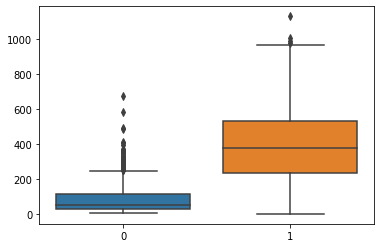

In [69]:
# The number of ratings per user before and after running the recommendation system.
sns.boxplot(data=[user_ratings_train.count(axis=1), pred_user.count(axis=1)])

In [70]:
# The neighbors of the user with id 1, along with theor corresponding distances from the user
id1_neighbors = neighborhoods_user.loc[1]
id1_neighbors

neighborhood_ids       [227, 224, 142, 8, 135, 69, 329, 165, 37, 266]
distance            [0.05924709639511294, 0.0871290708247231, 0.10...
Name: 1, dtype: object

In [71]:
# Drop all columns where there are at least three non-NaN values
user_ratings.loc[[1]+id1_neighbors['neighborhood_ids']].dropna(axis='columns', thresh=3)

title,Air Force One (1997),Alien (1979),Aliens (1986),Apollo 13 (1995),Batman (1989),Bean (1997),Beavis and Butt-head Do America (1996),Big Night (1996),"Birdcage, The (1996)",Blade Runner (1982),"Blues Brothers, The (1980)",Bound (1996),Braveheart (1995),Breaking the Waves (1996),Chasing Amy (1997),Clear and Present Danger (1994),Clerks (1994),Contact (1997),Crash (1996),Dead Man Walking (1995),"Devil's Own, The (1997)",Die Hard 2 (1990),"Empire Strikes Back, The (1980)","English Patient, The (1996)",Event Horizon (1997),Fargo (1996),"Fifth Element, The (1997)","Firm, The (1993)",Forrest Gump (1994),"Fugitive, The (1993)",G.I. Jane (1997),"Game, The (1997)",George of the Jungle (1997),Glory (1989),"Godfather, The (1972)","Godfather: Part II, The (1974)",Good Will Hunting (1997),GoodFellas (1990),"Graduate, The (1967)",Heat (1995),...,"Long Kiss Goodnight, The (1996)",Mother (1996),Mr. Holland's Opus (1995),Murder at 1600 (1997),"Nightmare Before Christmas, The (1993)",Outbreak (1995),"Peacemaker, The (1997)","Postino, Il (1994)",Primal Fear (1996),"Professional, The (1994)",Psycho (1960),Pulp Fiction (1994),Raiders of the Lost Ark (1981),Return of the Jedi (1983),"Rock, The (1996)","Saint, The (1997)",Scream (1996),Seven (Se7en) (1995),"Silence of the Lambs, The (1991)",Sling Blade (1996),"Spitfire Grill, The (1996)",Star Trek III: The Search for Spock (1984),Star Trek IV: The Voyage Home (1986),Star Trek VI: The Undiscovered Country (1991),Star Trek: First Contact (1996),Star Trek: The Wrath of Khan (1982),Star Wars (1977),Strange Days (1995),Swingers (1996),Terminator 2: Judgment Day (1991),"Terminator, The (1984)","Time to Kill, A (1996)",Titanic (1997),Trainspotting (1996),True Romance (1993),Twelve Monkeys (1995),Under Siege (1992),"Usual Suspects, The (1995)",White Squall (1996),"Wrong Trousers, The (1993)"
user_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,NaN,5.0,5.0,4.0,NaN,NaN,3.0,5.0,4.0,5.0,4.0,5.0,4.0,5.0,5.0,NaN,5.0,5.0,NaN,5.0,2.0,3.0,5.0,NaN,1.0,5.0,4.0,4.0,3.0,4.0,NaN,NaN,1.0,NaN,5.0,4.0,3.0,4.0,5.0,NaN,...,3.0,NaN,5.0,NaN,5.0,3.0,NaN,5.0,NaN,5.0,4.0,4.0,5.0,5.0,3.0,NaN,NaN,2.0,4.0,5.0,2.0,4.0,4.0,4.0,4.0,5.0,5.0,4.0,5.0,5.0,5.0,NaN,NaN,NaN,3.0,4.0,2.0,5.0,NaN,5.0
227,NaN,NaN,NaN,NaN,NaN,NaN,1.0,5.0,4.0,NaN,NaN,5.0,NaN,4.0,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,3.0,NaN,5.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,3.0,...,NaN,3.0,4.0,3.0,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.0,2.0,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,4.0,NaN,3.0,NaN,NaN,NaN,NaN,4.0,NaN,5.0,NaN,NaN,NaN,NaN
224,4.0,NaN,NaN,4.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,2.0,NaN,NaN,NaN,3.0,1.0,NaN,3.0,NaN,NaN,3.0,NaN,NaN,NaN,4.0,4.0,NaN,4.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.0,2.0,4.0,2.0,NaN,3.0,3.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,3.0,NaN,3.0,3.0,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,4.0,5.0,NaN,1.0,NaN,NaN,NaN,3.0,NaN
142,NaN,NaN,5.0,4.0,NaN,2.0,NaN,NaN,NaN,3.0,4.0,NaN,NaN,NaN,5.0,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,NaN,NaN,2.0,5.0,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,5.0,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,5.0
8,NaN,5.0,5.0,NaN,4.0,4.0,NaN,NaN,NaN,4.0,NaN,NaN,5.0,NaN,NaN,3.0,NaN,5.0,NaN,NaN,NaN,NaN,5.0,NaN,3.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,1.0,5.0,5.0,4.0,NaN,5.0,NaN,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,5.0,5.0,4.0,NaN,NaN,NaN,3.0,NaN,NaN,NaN,5.0,NaN,4.0,5.0,5.0,5.0,NaN,NaN,3.0,5.0,NaN,NaN,NaN,NaN,3.0,4.0,NaN,NaN,NaN
135,NaN,4.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,4.0,4.0,NaN,NaN,3.0,NaN,NaN,3.0,NaN,NaN,4.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,4.0,NaN,NaN,NaN,3.0,NaN,NaN,NaN,4.0,4.0,4.0,NaN,NaN,NaN,NaN,3.0,NaN,5.0,NaN,NaN,2.0,3.0,3.0,NaN,4.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,3.0,4.0,NaN,NaN
69,3.0,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,3.0,NaN,NaN,5.0,NaN,5.0,4.0,NaN,4.0,1.0,NaN,5.0,NaN,Na

In [72]:
#For a specific user (id=208), how the highest uknown ratings compare to the ratings the system predicted
user_ratings_test.loc[208].sort_values(ascending=False)[:20]

title
Graduate, The (1967)                         5.0
When Harry Met Sally... (1989)               5.0
Being There (1979)                           5.0
Sleepless in Seattle (1993)                  5.0
Butch Cassidy and the Sundance Kid (1969)    5.0
M*A*S*H (1970)                               5.0
Blues Brothers, The (1980)                   4.0
Cool Hand Luke (1967)                        4.0
Duck Soup (1933)                             4.0
Ghost (1990)                                 4.0
Young Frankenstein (1974)                    4.0
Great Dictator, The (1940)                   4.0
Groundhog Day (1993)                         4.0
Harold and Maude (1971)                      4.0
Somewhere in Time (1980)                     4.0
Annie Hall (1977)                            4.0
Four Weddings and a Funeral (1994)           3.0
Muriel's Wedding (1994)                      3.0
Back to the Future (1985)                    3.0
Clueless (1995)                              2.0
Name: 208, dty

In [73]:
def User_recommendation_for_user(id):
  return pred_user[user_ratings_test.loc[id].sort_values(ascending=False)[:20].index].loc[id].sort_values(ascending=False)

In [74]:
# Get 20 movies recommeded to user 208
print('Top 20 movies recommeded to user 208: \n',User_recommendation_for_user(208))

Top 20 movies recommeded to user 208: 
 title
Somewhere in Time (1980)                     5.0
Butch Cassidy and the Sundance Kid (1969)    5.0
Young Frankenstein (1974)                    5.0
Clueless (1995)                              4.0
Cool Hand Luke (1967)                        4.0
When Harry Met Sally... (1989)               4.0
Being There (1979)                           4.0
Sleepless in Seattle (1993)                  4.0
M*A*S*H (1970)                               4.0
Blues Brothers, The (1980)                   4.0
Ghost (1990)                                 4.0
Duck Soup (1933)                             4.0
Back to the Future (1985)                    4.0
Groundhog Day (1993)                         4.0
Muriel's Wedding (1994)                      4.0
Graduate, The (1967)                         4.0
Harold and Maude (1971)                      3.0
Annie Hall (1977)                            3.0
Four Weddings and a Funeral (1994)           3.0
Great Dictator, The (19

In [75]:
from sklearn.metrics import mean_squared_error 
from math import sqrt

'''RMSE evaluation function'''
def rmse(prediction, ground_truth):
  prediction = prediction[ground_truth.nonzero()].flatten()
  ground_truth = ground_truth[ground_truth.nonzero()].flatten()
  return sqrt(mean_squared_error(prediction, ground_truth))

In [76]:
UU_train = user_ratings_train.fillna(0)
UU_train = UU_train.values
UU_train.shape

(943, 1664)

In [77]:
UU_prediction = pred_user.fillna(0)
UU_prediction = UU_prediction.values
UU_prediction.shape

(943, 1664)

In [78]:
print('Test_User based CF RMSE:' + str(rmse(UU_train,UU_prediction)))

Test_User based CF RMSE:3.455016577647273


### Item-Item Neighbor based (predict rating)

#### The function to aggregate rating

In [79]:
def itemcf_predict_rating_closure(user_ratings, neighborhoods):
    # creates the predict rating function
    def itemcf_predict_rating_using_nmean(column):
        # for movie of the column 
        # calculate a rating based on average ratings 
        # of the neighbors-movies which the user has rated
        # round the result (because ratings are whole values)
        neighbors_titles = neighborhoods.loc[column.name][0]
        return round(user_ratings[neighbors_titles].mean(axis=1))
    
    return itemcf_predict_rating_using_nmean

In [80]:
# set a min_periods argument for the minimum number of observations required 
# per pair of columns to have a valid result.
# set the number of nearest neighbors to search
def recommendation_system_item_model(minperiods, nneighbors, user_ratings):
    # 1
    # movie_distances = movie similarity matrix. 
    # Similarity of each movie with every other movie.
    movie_distances = user_ratings.corr(method='pearson', 
                                        min_periods=minperiods)
    # Keep only the columns with at least nneighbors+1 number non-NA values.
    movie_distances = movie_distances.dropna(axis=0, 
                                             thresh=nneighbors+1).dropna(axis=1, 
                                                                         thresh=nneighbors+1)
    # Make the matrix square (dropping the rows as well)
    movie_distances = movie_distances.loc[movie_distances.columns]
    # from PCC ranging [-1,+1] to Pearson's distance [0,2]
    movie_distances = 1 - movie_distances
    # replace negative values with zero (solving float precision issue)
    movie_distances[movie_distances < 0] = 0
    # 2
    # define model
    # metric is “precomputed”, 
    # X is assumed to be a distance matrix and must be square during fit
    model_knn = NearestNeighbors(metric='precomputed', algorithm='brute', 
                                 n_neighbors=nneighbors, n_jobs=-1)
    # fit
    # X may be a sparse graph, 
    # in which case only “nonzero” elements may be considered neighbors
    model_knn.fit(csr_matrix(movie_distances.fillna(0).values))
    # get nearest neighbors
    similarity, indexes = model_knn.kneighbors(csr_matrix(movie_distances.fillna(0).values), 
                                               n_neighbors=nneighbors)
    # 3
    # dataframe with list of nns per movie
    neighborhoods = pd.DataFrame({'neighborhood_titles':
                                  [movie_distances.iloc[neighbors].index.to_list() 
                                                for neighbors in indexes.tolist()]}, 
                                 index=movie_distances.index)
    # Combine ratings using mean
    pred = user_ratings.reindex(columns=neighborhoods.index)\
                        .apply(itemcf_predict_rating_closure(user_ratings, neighborhoods))
    return pred, neighborhoods

####Hyperparameter Tuning

In [81]:
scoreboard = []
for min_periods in [6, 10, 50, 100]:
    for n_neighbors in [2, 5, 10, 20]:
        # temporarily supress warnings
        with warnings.catch_warnings():
            warnings.simplefilter("ignore")
            pred, neighborhoods = recommendation_system_item_model(min_periods, 
                                                                   n_neighbors, 
                                                                   user_ratings_train)
        # reindex predictions to include all movies 
        # (some get filtered for not having enough neigbors)
        pred = pred.reindex(columns=user_ratings_train.columns)
        # MAE
        error = mae(user_ratings_test, pred)
        rmse_score = sqrt(mean_squared_error(user_ratings_test.fillna(0), pred.fillna(0)))
        # percentage of movies not recommended to anyone (Only Nan ratings)
        m_not_rec = (pred.notna().sum(axis=0) == 0).sum() / pred.columns.size * 100
        # percentage of users without any recommendations
        u_not_rec = (pred.notna().sum(axis=1) == 0).sum() / pred.index.size * 100
        d = {"Min Periods": min_periods, 
             "KNN":n_neighbors,"MAE": error, "RMSE":rmse_score,
             "% of movies ignored": m_not_rec, '% of users ignored': u_not_rec,
            "fill %": df_fill_percentage(pred)}
        scoreboard.append(d)
scores = pd.DataFrame(scoreboard)
scores

,Min Periods,KNN,MAE,RMSE,% of movies ignored,% of users ignored,fill %
0,6,2,0.150368,1.267434,27.704327,0.000000,10.62
1,6,5,0.294928,1.672919,29.086538,0.000000,19.72
2,6,10,0.435882,1.964679,31.069712,0.000000,28.19
3,6,20,0.595488,2.272889,32.451923,0.000000,38.44
4,10,2,0.207826,1.317413,38.281250,0.000000,11.53
5,10,5,0.378724,1.689640,39.963942,0.000000,20.12
6,10,10,0.520179,1.964194,41.766827,0.000000,27.96
7,10,20,0.646162,2.215423,43.689904,0.000000,36.17
8,50,2,0.299059,1.168019,75.661058,0.000000,8.56
9,50,5,0.420410,1.343777,77.463942,0.000000,12.07


####Predictions Result & Evaluating Predictions(RMSE)

In [82]:
pred_item, neighborhoods_item = recommendation_system_item_model(6, 10, user_ratings_train)
pred_item = pred_item.reindex(columns=user_ratings_train.columns)


/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_base.py:168: EfficiencyWarning: Precomputed sparse input was not sorted by data.
  EfficiencyWarning)


In [83]:
pred_item

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",8 1/2 (1963),8 Heads in a Duffel Bag (1997),8 Seconds (1994),A Chef in Love (1996),Above the Rim (1994),Absolute Power (1997),"Abyss, The (1989)",Ace Ventura: Pet Detective (1994),Ace Ventura: When Nature Calls (1995),Across the Sea of Time (1995),Addams Family Values (1993),Addicted to Love (1997),"Addiction, The (1995)","Adventures of Pinocchio, The (1996)","Adventures of Priscilla, Queen of the Desert, The (1994)","Adventures of Robin Hood, The (1938)","Affair to Remember, An (1957)","African Queen, The (1951)",Afterglow (1997),"Age of Innocence, The (1993)",Aiqing wansui (1994),Air Bud (1997),Air Force One (1997),"Air Up There, The (1994)",Airheads (1994),Akira (1988),Aladdin (1992),Aladdin and the King of Thieves (1996),Alaska (1996),Albino Alligator (1996),...,"Whole Wide World, The (1996)",Widows' Peak (1994),"Wife, The (1995)",Wild America (1997),Wild Bill (1995),"Wild Bunch, The (1969)",Wild Reeds (1994),Wild Things (1998),William Shakespeare's Romeo and Juliet (1996),Willy Wonka and the Chocolate Factory (1971),Window to Paris (1994),Wings of Courage (1995),Wings of Desire (1987),"Wings of the Dove, The (1997)",Winnie the Pooh and the Blustery Day (1968),"Winter Guest, The (1997)",Wishmaster (1997),With Honors (1994),Withnail and I (1987),Witness (1985),"Wizard of Oz, The (1939)",Wolf (1994),"Woman in Question, The (1950)","Women, The (1939)","Wonderful, Horrible Life of Leni Riefenstahl, The (1993)",Wonderland (1997),"Wooden Man's Bride, The (Wu Kui) (1994)","World of Apu, The (Apur Sansar) (1959)","Wrong Trousers, The (1993)",Wyatt Earp (1994),Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,4.0,3.0,5.0,5.0,NaN,NaN,3.0,5.0,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,4.0,3.0,NaN,NaN,NaN,NaN,3.0,5.0,5.0,3.0,NaN,4.0,NaN,4.0,NaN,5.0,1.0,4.0,4.0,NaN,...,NaN,4.0,NaN,NaN,4.0,5.0,5.0,NaN,NaN,NaN,NaN,NaN,4.0,5.0,NaN,NaN,2.0,2.0,4.0,NaN,NaN,1.0,NaN,4.0,NaN,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,2.0,2.0,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,4.0,4.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,...,NaN,4.0,NaN,NaN,5.0,5.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,4.0,NaN,2.0,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,5.0,3.0,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,5.0,NaN,NaN,2.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,4.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,4.0,NaN,2.0,1.0,NaN,2.0,NaN,2.0,1.0,NaN,NaN,NaN,NaN,4.0,2.0,1.0,3.0,NaN,3.0,2.0,3.0,NaN,...,NaN,3.0,NaN,NaN,4.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,4.0,2.0,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,4.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

In [84]:
# The percentage of computed values in the user-item rating matrix
print('The percentage of computed values in the user-item rating matrix: ', df_fill_percentage(pred_item) - df_fill_percentage(user_ratings_train))

The percentage of computed values in the user-item rating matrix:  23.1


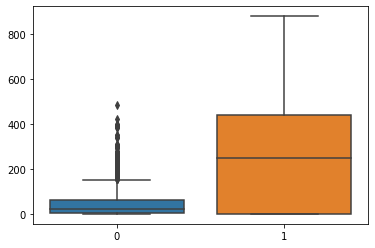

In [85]:
# The number of ratings per user before and after running the recommendation system.
sns.boxplot(data=[user_ratings_train.count(axis=0), pred_item.count(axis=0)])

In [86]:
# Get all neighbor items' title of a movie 
neighborhoods_item.loc['Young Guns II (1990)'][0]

['Ghost and the Darkness, The (1996)',
 'Malice (1993)',
 'Hamlet (1996)',
 'Perfect World, A (1993)',
 'Fox and the Hound, The (1981)',
 'Speechless (1994)',
 'Ben-Hur (1959)',
 'Bedknobs and Broomsticks (1971)',
 'Young Guns (1988)',
 'How to Make an American Quilt (1995)']

In [87]:
print('Top 20 movies rated by user 373:')
user_ratings_test.loc[373].sort_values(ascending=False)[:20]

Top 20 movies rated by user 373:


title
Miracle on 34th Street (1994)                             5.0
Schindler's List (1993)                                   5.0
Monty Python's Life of Brian (1979)                       5.0
Last of the Mohicans, The (1992)                          5.0
Indiana Jones and the Last Crusade (1989)                 5.0
Persuasion (1995)                                         5.0
Wallace & Gromit: The Best of Aardman Animation (1996)    5.0
Blade Runner (1982)                                       5.0
Circle of Friends (1995)                                  5.0
Back to the Future (1985)                                 5.0
Bed of Roses (1996)                                       5.0
Grease (1978)                                             5.0
Aristocats, The (1970)                                    5.0
Strictly Ballroom (1992)                                  5.0
Dead Poets Society (1989)                                 5.0
Crow, The (1994)                                          5.0
Fi

In [88]:
def Item_recommendation_for_user(id):
  return pred_item[user_ratings_test.loc[id].sort_values(ascending=False)[:20].index].loc[id].sort_values(ascending=False)

In [89]:
# Get 20 movies recommeded to user 373
print('Top 20 movies recommend to user 373: \n', Item_recommendation_for_user(373))

Top 20 movies recommend to user 373: 
 title
Full Monty, The (1997)                                    5.0
Strictly Ballroom (1992)                                  5.0
Grease (1978)                                             5.0
Circle of Friends (1995)                                  5.0
Aristocats, The (1970)                                    4.0
Bed of Roses (1996)                                       4.0
Back to the Future (1985)                                 4.0
Wallace & Gromit: The Best of Aardman Animation (1996)    4.0
Indiana Jones and the Last Crusade (1989)                 4.0
His Girl Friday (1940)                                    3.0
Crow, The (1994)                                          3.0
Last of the Mohicans, The (1992)                          3.0
Miracle on 34th Street (1994)                             NaN
Schindler's List (1993)                                   NaN
Monty Python's Life of Brian (1979)                       NaN
Persuasion (1995)        

In [90]:
II_train = user_ratings_train.fillna(0)
II_train = II_train.values
II_train.shape

(943, 1664)

In [91]:
II_prediction = pred_item.fillna(0)
II_prediction = II_prediction.values
II_prediction.shape

(943, 1664)

In [92]:
print('Test_User based CF RMSE:' + str(rmse(II_train,II_prediction)))

Test_User based CF RMSE:3.5448855476156376


# Content-based recommendation system - TF-IDF (term frequency–inverse document frequency)

In [93]:
import pandas as pd
import numpy as np

## Content-based Recomendation on Similar Movie System 

### Data pre-processing

In [94]:
movies = movirlens_item.copy()
genre_type=np.array(movirlens_genre.iloc[:,0])
movies['genres'] = ' '
for col in genre_type:
    movies[col].replace(1,col,inplace=True)
    movies[col].replace(0,'NaN',inplace=True)
    movies['genres'] = movies['genres'] + '|' + movies[col]
movies['genres'] = movies['genres'].str.replace(r'[|]NaN', '')
movies['genres'] = movies['genres'].str.strip(' |')
movies = pd.DataFrame(movies,columns=['movie_id', 'movie_title','genres'])
movies['genres'] = movies['genres'].str.replace(r'[|]NaN', '')


# ml_1m_datasets
#movies = ml_1m_movies.copy()

#for both 100k dataset and 1m dataset, remove the year of the 
movies['movie_title'] = movies['movie_title'].str.replace(r'\(.*?\)','')
movies['movie_title'] = movies['movie_title'].str.strip()


### Calculate the TF-IDF matrix

In [95]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer(stop_words='english')
movies['genres']=movies['genres'].fillna('')
tfidf_matrix=tfidf.fit_transform(movies['genres'])
tfidf_matrix.shape

(1682, 21)

### Get the cosine distance

In [96]:
from sklearn.metrics.pairwise import linear_kernel
tf_idf_prediction=linear_kernel(tfidf_matrix,tfidf_matrix)

### Recommendation on similar movies

In [97]:
from tabulate import tabulate
from sklearn.metrics.pairwise import linear_kernel
from sklearn.feature_extraction.text import TfidfVectorizer

def TF_IDF_get_recommendation():
    # based on genres or title?
    str = input("Content based recommend based on 'movie_title'	or 'genres': ");
    print ("Content based recommend based on: ", str)

    # if str == 'movie_title':

    tfidf=TfidfVectorizer(stop_words='english')
    movies[str]=movies[str].fillna('')
    tfidf_matrix=tfidf.fit_transform(movies[str])

    tf_idf_prediction=linear_kernel(tfidf_matrix,tfidf_matrix)

    indices=pd.Series(movies.index,index=movies['movie_title'])

    # select the movie title without year
    while True:
      try:
        
          title = input("Movie title input here: ");
          print ("Content based recommend based on: ", title)
          idx=indices[title]
          break
      except KeyError:
          confirm_name = process.extractOne(title, movies['movie_title'])[0]
          print("Do you mean " + confirm_name + " ?")
          comfirm = input("Yes or No : ")
          if comfirm == 'Yes':
            idx=indices[confirm_name]
            break
          else:
            print("Try again...")
            print("You may check the movies list and Capitalize every word")
      except KeyError:
          print("Oops!  That was no valid movie.  Try again...")

    # find the recommend movies by using the tf_idf_prediction matrix
    sim = list(enumerate(tf_idf_prediction[idx]))
    movie_recommend = []
    movie_idx = []
    for i in sorted(sim,key=lambda x:x[1],reverse=True):
      if i[1]!=0 and i[0]!=idx:
        #movies_index = [i[0] for i in sorted(sim,key=lambda x:x[1],reverse=True)[1:11]]
        idx = i[0]
        movie_idx.append(idx)
        movie_recommend.append(movies['movie_title'].iloc[idx])
    mov = {'Recommended Moives':movie_recommend}
    return pd.DataFrame(mov,index=movie_idx).head(20)


TF_IDF_get_recommendation()

Content based recommend based on 'movie_title'	or 'genres': genres
Content based recommend based on:  genres
Movie title input here: Star Wars
Content based recommend based on:  Star Wars


,Recommended Moives
180,Return of the Jedi
171,"Empire Strikes Back, The"
270,Starship Troopers
120,Independence Day
234,Mars Attacks!
61,Stargate
81,Jurassic Park
221,Star Trek: First Contact
226,Star Trek VI: The Undiscovered Country
227,Star Trek: The Wrath of Khan


## Content-based filtering recommendation system ((predict rating Top-N)
Use linear regression with input as a feature matrix and evaluation score

### Feature Matrix

In [98]:
#Use TD_IDF function to convert to feature matrix
tfidf = tfidf_matrix.toarray()

### Data pre-processing

In [99]:
#Divide the data set into Train and Test
CBF_ratings_base  = movirlens_data.sort_values(by = ['timestamp'], ascending = True)[0:int(np.trunc(movirlens_data.shape[0]*0.8))].copy()

CBF_ratings_test  = movirlens_data.sort_values(by = ['timestamp'], ascending = True)[int(np.trunc(movirlens_data.shape[0]*0.8)):].copy()

# using the test and base data in the downloaded file
# CBF_ratings_base = pd.read_csv('https://raw.githubusercontent.com/RobertMa05/Selected-Topic2-Movie-Recommendation/main/ml-100k_datasets/u1.base',
#                             sep='\t',names=['user_id','movie_id','rating'], usecols=[0,1,2])

# CBF_ratings_test = pd.read_csv('https://raw.githubusercontent.com/RobertMa05/Selected-Topic2-Movie-Recommendation/main/ml-100k_datasets/u1.test',
#                             sep='\t',names=['user_id','movie_id','rating'], usecols=[0,1,2])

CBF_rate_train = CBF_ratings_base.to_numpy()
CBF_rate_test = CBF_ratings_test.to_numpy()

In [100]:
#Learn the number of users
CBF_n_users = movirlens_user.shape[0]

In [101]:
CBF_ratings_base

,user_id,item_id,rating,timestamp
214,259,255,4,874724710
83965,259,286,4,874724727
43027,259,298,4,874724754
21396,259,185,4,874724781
82655,259,173,4,874724843
...,...,...,...,...
41910,3,271,3,889237224
1343,3,245,1,889237247
27975,3,355,3,889237247
10869,3,324,2,889237247


In [102]:
def get_items_rated_by_user(rate_matrix, user_id):
    """
    return (item_ids, mov_scores)
    """
    y = rate_matrix[:,0] # users
    # Get the rating of user
    # user_id start with 1
    mov_ids = np.where(y == user_id +1)[0] 
    item_ids = rate_matrix[mov_ids, 1] - 1  #fit the matrix, so  mov_ids - 1
    mov_scores = rate_matrix[mov_ids, 2]
    return (item_ids, mov_scores)
mov_ids, mov_scores = get_items_rated_by_user(CBF_rate_train, 258)
list_head = np.concatenate((mov_ids.reshape(len(mov_ids),1), mov_scores.reshape(len(mov_scores),1)),axis = 1)[0:10]
print(list_head)

[[254   4]
 [285   4]
 [297   4]
 [184   4]
 [172   4]
 [107   4]
 [771   4]
 [287   3]
 [927   4]
 [116   4]]


In [104]:
from sklearn.linear_model import Ridge # linear regression model with regularization

dimension = tfidf.shape[1] # data dimension
W = np.zeros((dimension, CBF_n_users)) # Weight
b = np.zeros((1, CBF_n_users)) # bias

for n in range(CBF_n_users): 
    mov_ids, mov_scores = get_items_rated_by_user(CBF_rate_train, n)
    clf = Ridge(alpha=0.01, fit_intercept  = True)
    Xhat = tfidf[mov_ids, :]
    if Xhat.shape[0] > 0 : 
      clf.fit(Xhat, mov_scores) 
      W[:, n] = clf.coef_
      b[0, n] = clf.intercept_

In [105]:
np.unique(CBF_rate_test[:,0])

array([  1,   3,   4,   7,  11,  13,  14,  23,  26,  27,  33,  38,  39,
        41,  43,  54,  56,  58,  60,  61,  64,  79,  83,  85,  88,  90,
        91,  92,  94, 100, 102, 107, 111, 112, 116, 119, 120, 121, 124,
       125, 132, 133, 134, 145, 146, 152, 159, 161, 163, 164, 167, 169,
       171, 174, 178, 179, 183, 184, 186, 189, 190, 191, 193, 195, 197,
       200, 204, 207, 210, 214, 215, 219, 223, 228, 229, 232, 233, 234,
       235, 236, 247, 252, 253, 260, 261, 263, 266, 269, 273, 276, 278,
       279, 280, 285, 286, 294, 299, 312, 313, 317, 319, 325, 328, 329,
       332, 333, 334, 335, 339, 341, 344, 353, 354, 356, 358, 363, 365,
       368, 369, 377, 378, 379, 381, 383, 384, 392, 393, 397, 401, 407,
       408, 411, 416, 418, 420, 421, 423, 425, 428, 432, 435, 440, 441,
       444, 445, 448, 450, 453, 454, 455, 458, 463, 466, 471, 472, 475,
       478, 479, 480, 483, 484, 485, 488, 489, 491, 499, 500, 503, 504,
       505, 506, 507, 511, 514, 516, 517, 530, 532, 533, 543, 54

### Predictive model

In [106]:
# predicted matrix after add weight and bias
Yhat = tfidf.dot(W) + b 
print('The predicted rating of user 100: \n',Yhat[:,100])

The predicted rating of user 100: 
 [3.00165882 3.40753897 2.43089752 ... 3.37791391 2.11329252 2.40702559]


In [107]:
# recommend on a user
'''
:param n: the number of most similar users
'''
uid = 100
mov_ids, mov_scores = get_items_rated_by_user(CBF_rate_test, uid-1) #in matrix, the first start with 0

# find the titles for the movies
movies_indices = pd.Series(data=movirlens_item['movie_title'], index=movirlens_item['movie_id'])
titles = []
for mov in mov_ids:
  titles.append(movies_indices[mov])
print('Recommend on user id: ',uid)
print('Rated movies ids: \n', mov_ids)
print('True ratings: \n', mov_scores)
print('Predicted ratings: \n', Yhat[mov_ids, uid])


Recommend on user id:  100
Rated movies ids: 
 [ 332  301  287  268  257  312  339  899  750  343  886  873  878  267
  749  269  907 1237 1233  299  320 1232  291  751  880  346  894  327
  688  690  879  270  353  354  315  293  288  884  322  677  989  341
 1234  897  891  265  309  885  314  689  271  285  348  345  325  904
 1236 1235  347]
True ratings: 
 [3 4 2 4 4 5 3 4 4 4 2 1 4 3 4 3 1 2 1 4 1 3 2 4 1 4 2 4 3 4 1 3 2 4 5 4 3
 2 3 3 3 3 4 4 2 2 3 3 5 4 4 3 3 3 3 3 3 3 3]
Predicted ratings: 
 [3.54295298 3.29831518 2.71601073 2.11329252 2.48152985 3.61058563
 2.40702559 2.40702559 3.59472342 2.40702559 2.40702559 2.40702559
 3.58392291 3.37791391 2.40702559 2.79820978 2.11329252 2.40702559
 2.11329252 2.8978804  2.11329252 2.40702559 2.40702559 2.8978804
 2.70375068 2.55338278 2.71601073 4.28568215 2.8978804  2.18970275
 2.40702559 3.69306042 3.18496144 3.08633371 2.55338278 2.11329252
 2.44831951 2.32170484 2.8978804  2.77307808 3.37791391 3.41379289
 3.36182602 2.40702559 2.1

In [108]:
pd.DataFrame(list(zip(titles, scores, Yhat[mov_ids, uid])),
               columns =['Movie titles', 'scores', 'predicted scores']).head(15)

,Movie titles,scores,predicted scores
0,"Game, The (1997)",Min Periods,3.542953
1,L.A. Confidential (1997),KNN,3.298315
2,Scream (1996),MAE,2.716011
3,"Full Monty, The (1997)",RMSE,2.113293
4,Contact (1997),% of movies ignored,2.481530
5,Titanic (1997),% of users ignored,3.610586
6,Boogie Nights (1997),fill %,2.407026


### Evaluating Predictions(RMSE)

In [109]:
from math import sqrt
def CBF_evaluate(Yhat, rates, W, b):
    se = 0
    count = 0
    for n in range(CBF_n_users):
        ids, scores_truth = get_items_rated_by_user(rates, n)
        scores_pred = Yhat[ids, n]
        e = scores_truth - scores_pred 
        se += (e*e).sum(axis = 0)
        count += e.size 
    return sqrt(se/count)

In [110]:
print('The RMSE score for the Content-based filtering recommendation system is: ', CBF_evaluate(Yhat, CBF_rate_test, W, b))

The RMSE score for the Content-based filtering recommendation system is:  3.499512368026209
